In [1]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups

In [2]:
# Load dataset
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)

In [3]:
len(newsgroups.target)

18846

In [4]:
newsgroups.data[0]

"From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>\nSubject: Pens fans reactions\nOrganization: Post Office, Carnegie Mellon, Pittsburgh, PA\nLines: 12\nNNTP-Posting-Host: po4.andrew.cmu.edu\n\n\n\nI am sure some bashers of Pens fans are pretty confused about the lack\nof any kind of posts about the recent Pens massacre of the Devils. Actually,\nI am  bit puzzled too and a bit relieved. However, I am going to put an end\nto non-PIttsburghers' relief with a bit of praise for the Pens. Man, they\nare killing those Devils worse than I thought. Jagr just showed you why\nhe is much better than his regular season stats. He is also a lot\nfo fun to watch in the playoffs. Bowman should let JAgr have a lot of\nfun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final\nregular season game.          PENS RULE!!!\n\n"

In [5]:
newsgroups.target[0]

np.int64(10)

In [6]:
X = newsgroups.data
y = newsgroups.target

In [7]:
print(len(X), len(y))

18846 18846


In [8]:
# Create a DataFrame for easy manipulation
df = pd.DataFrame({'text': X, 'label': y})
df.head()

,text,label
0,From: Mamatha Devineni Ratnam <mr47+@andrew.cm...,10
1,From: mblawson@midway.ecn.uoknor.edu (Matthew ...,3
2,From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...,17
3,From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...,3
4,From: Alexander Samuel McDiarmid <am2o+@andrew...,4


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)

In [10]:
# Transform the text data to feature vectors
X_vect = vectorizer.fit_transform(df['text'])

In [11]:
# Labels
y = df['label']

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [13]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.3, random_state=42)

In [14]:
X_train.shape

(13192, 173448)

In [15]:
X_test.shape

(5654, 173448)

In [16]:
# Initialize and train the classifier
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [17]:
from sklearn.metrics import accuracy_score, classification_report

In [18]:
# Predict on the test set
y_pred = clf.predict(X_test)

In [19]:
y_pred

array([ 9, 12, 14, ...,  0, 18,  1])

In [20]:
# Evaluate the performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=newsgroups.target_names)

In [21]:
print(f'Accuracy: {accuracy*100:.2f}%')
print('Classification Report:')
print(report)

Accuracy: 91.63%
Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.94      0.93      0.93       236
           comp.graphics       0.76      0.88      0.82       287
 comp.os.ms-windows.misc       0.87      0.85      0.86       290
comp.sys.ibm.pc.hardware       0.77      0.81      0.79       285
   comp.sys.mac.hardware       0.91      0.87      0.89       312
          comp.windows.x       0.90      0.87      0.88       308
            misc.forsale       0.83      0.88      0.86       276
               rec.autos       0.92      0.93      0.93       304
         rec.motorcycles       1.00      0.95      0.97       279
      rec.sport.baseball       0.97      0.97      0.97       308
        rec.sport.hockey       0.97      0.97      0.97       309
               sci.crypt       0.99      0.95      0.97       290
         sci.electronics       0.87      0.87      0.87       304
                 sci.med       0.93

In [22]:
def predict_category(text):
    """
    Predict the category of a given text using the trained classifier.
    """
    text_vec = vectorizer.transform([text])
    prediction = clf.predict(text_vec)
    return newsgroups.target_names[prediction[0]]

# Example usage
sample_text = "NASA announced the discovery of new exoplanets."
predicted_category = predict_category(sample_text)
print(f'The predicted category is: {predicted_category}')

The predicted category is: sci.space


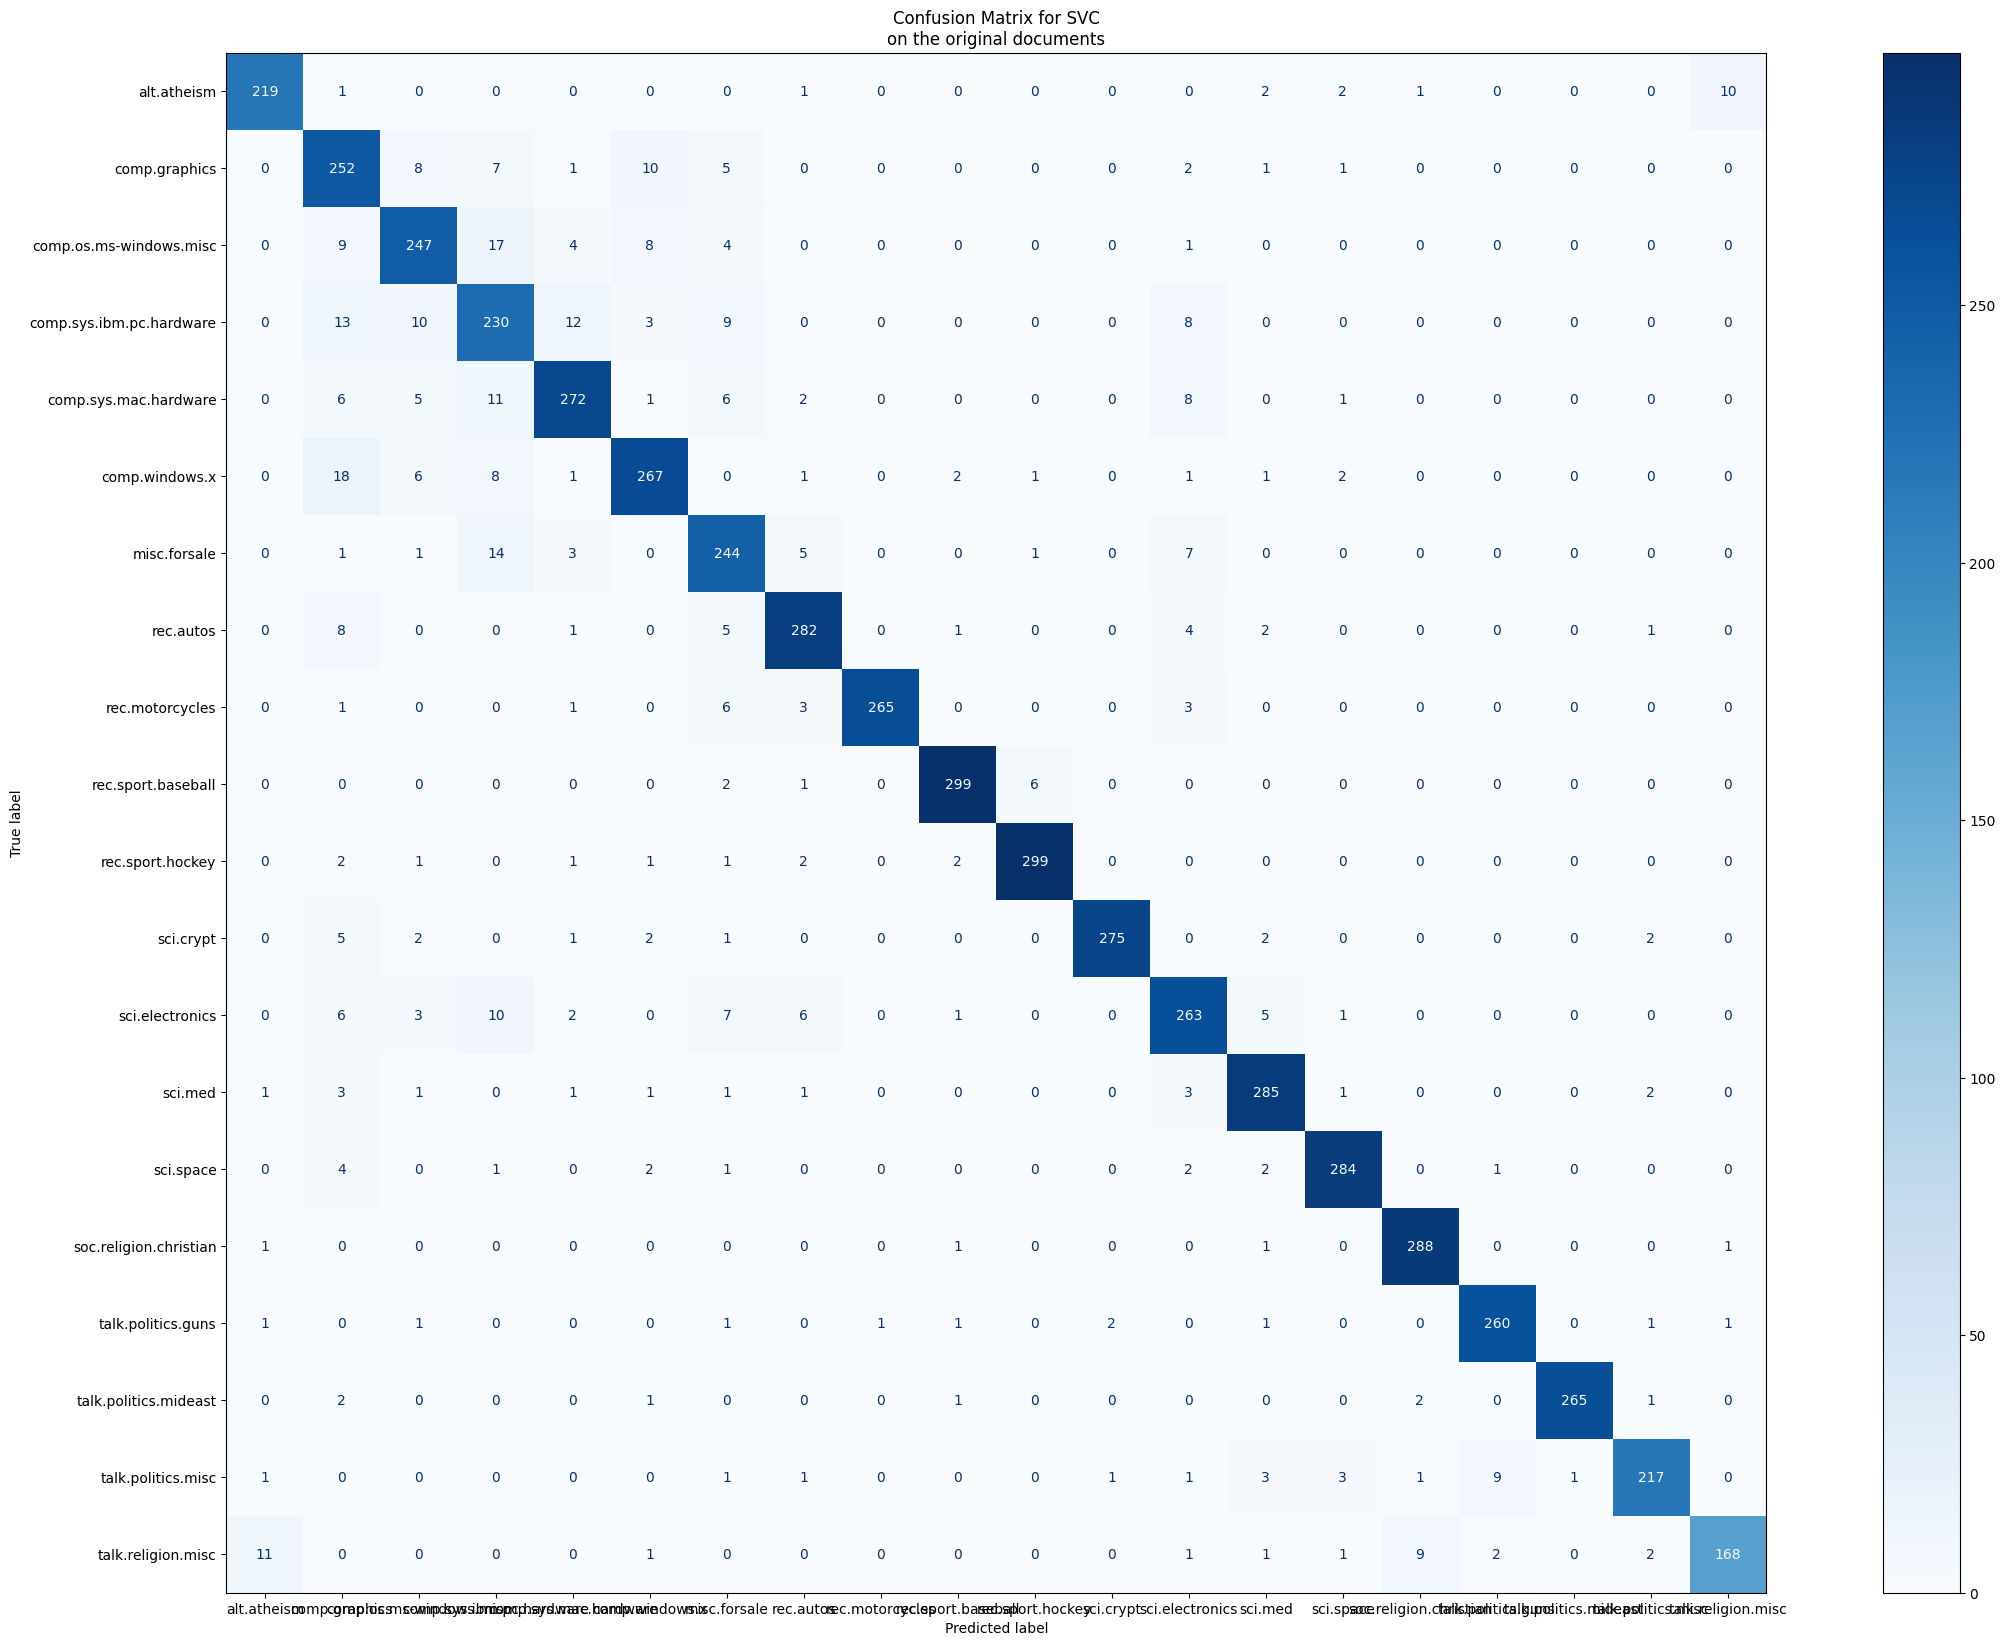

In [31]:
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay # C.M.

target_names = newsgroups.target_names

fig, ax = plt.subplots(figsize=(30, 20))
# Se cambió el cmap de viridis a Blues. Este cmap es el más común en C.M.
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax, cmap='Blues')
ax.xaxis.set_ticklabels(target_names)
ax.yaxis.set_ticklabels(target_names)
_ = ax.set_title(
    f"Confusion Matrix for {clf.__class__.__name__}\non the original documents"
)
plt.show()